# Problema Titanic - Plataforma Kaggle

#### O problema consiste em utilizar um modelo de machine learning que consiga prever quem irá sobreviver e quem não irá ao desastre, a partir de dados reais da tragédia.

## 1º Passo: Leitura dos dados

In [1]:
import pandas as pd
import numpy as np

In [2]:
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

In [3]:
# Conhecendo o tamanho do dataframe treino
treino.shape

(891, 12)

In [4]:
# Conhecendo o tamanho do dataframe teste
teste.shape

(418, 11)

#### Iremos trabalhar nosso modelo com o dataframe treino.

In [5]:
# Juntando os dados e renomeando-os
total = treino.append(teste, ignore_index=True)
titanic = total[:891]

In [6]:
del teste, treino

### Funções de Visualização

In [7]:
# Gráficos de barra
def bar_plot(data, target):
    fig = plt.figure(figsize=(6,4))
    eixo = fig.add_axes([0,0,1,1])
    bar_plot = sns.barplot(x=data[target], y=data['Survived'])
    bar_plot.set_title(f'Comparação dos Sobreviventes em relação a feature {target}', fontsize=15, pad=10)
    bar_plot.set_xlabel(f'{target}', fontsize=10)
    bar_plot.set_ylabel('Sobreviventes', fontsize=10)
    bar_plot.tick_params(labelsize=10)

# Gráfico de distribuição
def area_plot(data, feature, hue):
    fig = plt.figure(figsize=(15,6))
    ax = sns.kdeplot(titanic.loc[(data[hue] == 0), feature], color='k', shade=True, label='Não Sobrevivente')
    ax = sns.kdeplot(titanic.loc[(data[hue] == 1), feature], color='orange', shade=True, label='Sobrevivente')
    ax.set(xlim=(0, data[feature].max()))
    plt.title(f'Distribuição da feature {feature} - Sobreviventes vs Não Sobreviventes', fontsize=20, pad=20)
    plt.xlabel('Idade', fontsize=15)
    plt.ylabel('Frequência', fontsize=15)
    plt.legend()
    plt.show()

## 2º Passo: Entendendo os dados

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


#### Percebe-se que existem alguns dados faltantes nas features Age e Cabin

In [10]:
# Importando bibliotecas para visualizações gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

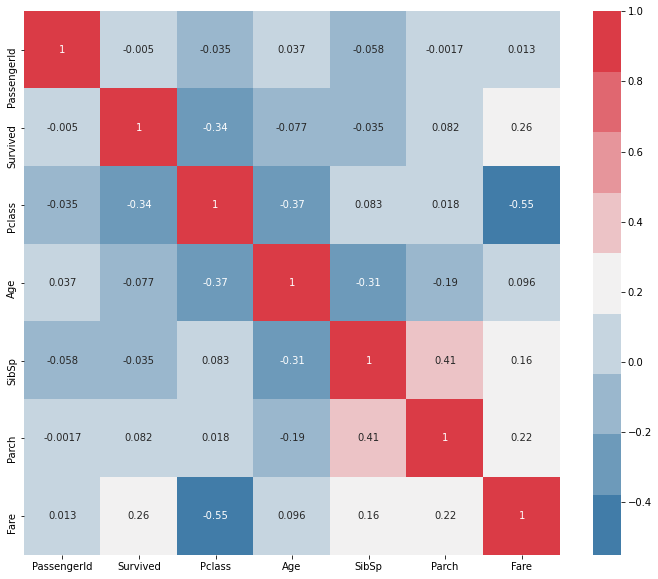

In [11]:
# Criando um mapa de calor para entender os pesos das features
hm_data = titanic.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])
correlation = hm_data.corr()
heatmap = plt.figure(figsize=(12,10))
cmap = sns.diverging_palette(240, 10, n=9)
heatmap = sns.heatmap(correlation, annot=True, cmap=cmap)

#### Nesse mapa de calor podemos ver que entre essas features, a que indica maior relação positiva com a sobrevivência são as features Parch e Sibsp (ambas relacionam número de pais e filhos a bordo do navio) e a maior relação negativa com a sobrevivência são as features Pclass e Fare (Classe do passageiro e Conta)

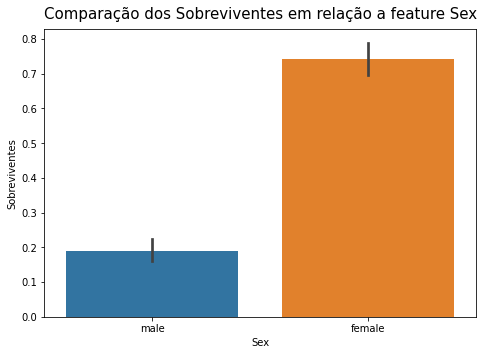

In [12]:
# Boxplot de relação entre Sexo e Sobrevivência
bar_plot(titanic, 'Sex')

#### Nota-se que as mulheres tiveram uma maior chance de sobreviver do que os homens

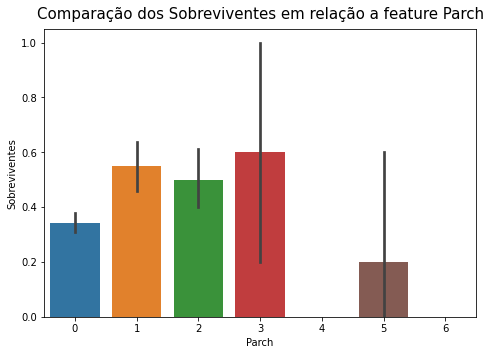

In [13]:
# Boxplot de relação entre Quantidade de marido e/ou filhos e Sobrevivência
bar_plot(titanic, 'Parch')

#### Contradizendo o mapa de calor, podemos ver que não existe muita relação entre o número de pais/crianças com a sobrevivência

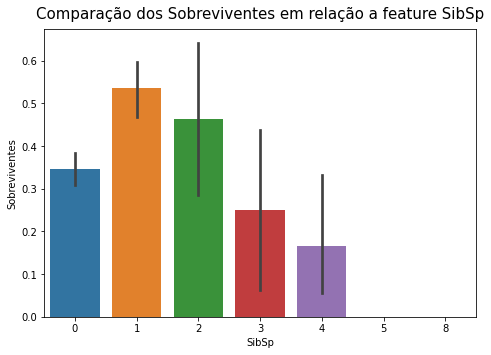

In [14]:
# Boxplot de relação entre Quantidade de esposa e/ou filhos e Sobrevivência
bar_plot(titanic, 'SibSp')

#### O mesmo problema citado na análise acima ocorre para esse gráfico

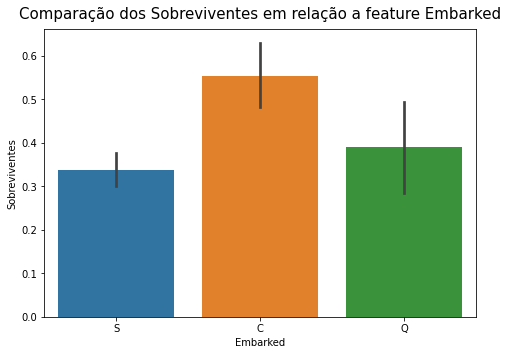

In [15]:
# Boxplot de relação entre Porto de Embarque e Sobrevivência
bar_plot(titanic, 'Embarked')

#### Nota-se que passageiros do porto de embarque C tiveram uma maior chance de sobrevivência

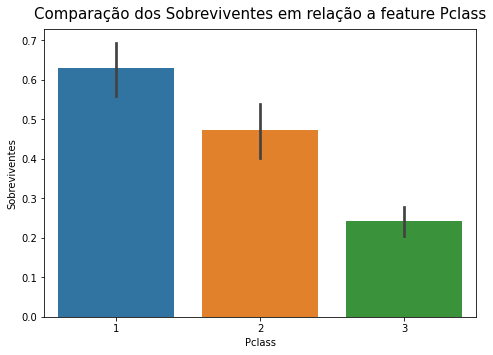

In [16]:
# Boxplot de relação entre Classe e Sobrevivência
bar_plot(titanic, 'Pclass')

#### Nota-se que passageiros da 1º Classe tiveram uma maior chance de sobrevivência

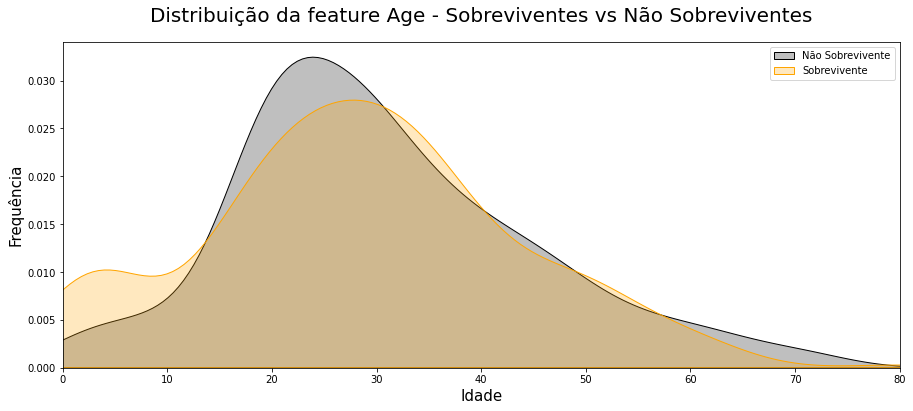

In [17]:
# Distribuição dos sobreviventes por idade
area_plot(titanic, 'Age', 'Survived')

#### A partir da distribuição de idades é possível ter uma melhor noção da relação de sobrevivência com a idade, nota-se que o pico de sobreviventes e não sobreviventes está próximo do mesmo range, tal fato indica que existia uma maioria adulta (18-40) e que nesse range o fator idade não foi decisivo na sobrevivência, já para o range de idade (0-15) houve uma maior quantidade de sobrevivente, indicando que nesse range o fator idade pode ter sido um atributo decisivo na sobrevivência

## 3ºPasso: Preparando os Dados

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.7+ KB


#### Pelo fato de que há muitos dados faltantes na feature Cabin, essa feature não será utilizada no modelo, além disso, a feature id passageiros não faz sentido existir, já que cada passageiro já tem um index relacionado, assim essa coluna torna-se obsoleta

In [20]:
# Retirando as features: PassengerId, Name, Ticket e Cabin do nosso dataframe
titanic = titanic.drop(columns=['PassengerId', 'Cabin', 'Ticket'])
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [21]:
# Separando os dados a serem modelados (X) com a resposta esperada (y)
X = titanic.drop(columns=['Survived'])
y = titanic['Survived']

#### Como a feature Age contém dados faltantes, será incluído a média das idades nesses dados faltantes, pois como são poucos em relação a quantidade total de dados, essa abordagem será tomada

In [22]:
# Aplicando a média das idades para os dados faltantes na coluna 'Age'
age_mean = X['Age'].mean().round(2)
X.fillna(age_mean, inplace = True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [23]:
# Usando a função get_dummies para encoding
X = pd.get_dummies(X, columns=['Sex','Embarked'])
X.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_29.7,Embarked_C,Embarked_Q,Embarked_S
0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,1,0,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,0,1,0,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,0,0,1
4,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,1,0,0,0,1


In [24]:
# Retirando as features Sex_male e Embarked_Q, já que elas já estão ligadas diretamente as features
# Sex_female e (Embarked_C e Embarked_S) respectivamente
X.drop(columns=['Sex_male', 'Embarked_29.7'], inplace=True)
X.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,1,0,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,1
4,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,0,0,1


## 4ºPasso: Engenharia de dados: Criando novas variáveis

In [25]:
X.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,1,0,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,1
4,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,0,0,1


#### Será criado novos títulos para substituir os nomes, já que títulos indicam certo status social, e isso pode ser um atributo importante na probabildiade de sobrevivência

In [26]:
# Extraindo o titulo de cada nome
titulo = pd.DataFrame()
titulo['Title'] = X['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())

In [27]:
# Agrupando títulos
novos_titulos = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }

In [28]:
# Mapeando os títulos
titulo['Title'] = titulo.Title.map(novos_titulos)
titulo = pd.get_dummies(titulo.Title)
titulo.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


#### ALém dos títulos, as variaveis Parch e SibSp tem relações parecidas, assim, pode-se criar uma nova categoria chamada tamanho de família, fazendo com que fique mais compreensível esses dados

In [29]:
familia = pd.DataFrame()

# Criando a feature tamanho de familia
familia['FamilySize'] = X['Parch'] + X['SibSp'] + 1

In [30]:
# Gerando novas features baseados no tamanho da família
familia['Family_Single'] = familia['FamilySize'].map(lambda s: 1 if s == 1 else 0)
familia['Family_Small'] = familia['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
familia['Family_Large'] = familia['FamilySize'].map(lambda s: 1 if s >= 5 else 0)

familia.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [31]:
# Reunindo as novas features no novo dado a ser modelado X, e excluindo a variavel Name, Parch e SibSp, pois foram alteradas
novo_X = pd.concat([X,titulo,familia], axis=1)
novo_X.drop(columns=['Name', 'Parch', 'SibSp'], inplace=True)
novo_X.head()

,Pclass,Age,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Master,Miss,Mr,Mrs,Officer,Royalty,FamilySize,Family_Single,Family_Small,Family_Large
0,3,22.0,7.2500,0,0,0,1,0,0,1,0,0,0,2,0,1,0
1,1,38.0,71.2833,1,1,0,0,0,0,0,1,0,0,2,0,1,0
2,3,26.0,7.9250,1,0,0,1,0,1,0,0,0,0,1,1,0,0
3,1,35.0,53.1000,1,0,0,1,0,0,0,1,0,0,2,0,1,0
4,3,35.0,8.0500,0,0,0,1,0,0,1,0,0,0,1,1,0,0


## 5ºPasso: Descobrindo as importâncias de cada Feature 

#### Nesse passo, será aplicado o RFE (Recursive feature elimination), com isso será possível determinar quais são as features com maior importância, e assim trabalhar apenas com elas, diminuindo assim a necessidade de poder computacional para o modelo de Machine Learning.

In [32]:
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

SEED = 42
np.random.seed(SEED)

# Criando o modelo base em que o RFECV será aplicado
model = DecisionTreeRegressor()

# Criando o RFE para escolher as melhores features
rfe = RFE(estimator = model, n_features_to_select = 6)

# Aplicando o RFE nos dados trabalhados anteriormente
rfe.fit(novo_X, y)

# Colocando as melhores features em mais um novo X
X2 = rfe.transform(novo_X)

In [33]:
# Ranqueeando as features de acordo com quais geram o maior 'accuracy_score'
rfe.ranking_

array([ 1,  1,  1,  9, 11,  5,  2,  6,  7,  1, 12,  1,  4,  1, 10,  8,  3])

#### Com o ranqueamento das features mais importantes, temos que (Pclass, Age, Fare, Mr, Officer e FamilySize) foram consideradas as mais importantes

#### Entretanto, nas análises gráficas foi percebido que a feature Sexo tinha muita relação com a sobrevivência, portanto foi decidido adicionar essa feature as features finais a serem trabalhadas.

In [34]:
# Criando um array com a feature Sex_female
sexo = novo_X['Sex_female']
sexo = sexo.to_numpy()
sexo = np.reshape(sexo, (len(sexo),1))


In [35]:
# Gerando um novo array de features (X3) com Sex_female inserido
X3 = np.hstack((X2,sexo))

## 6ºPasso: Treinando o modelo de Machine Learning e otmizando-o

#### Primeiramente, foi aplicado o processo de Cross-Validation (Validação Cruzada) juntamente com um Modelo de Machine Learning a fim de treinar nosso modelo com os dados tratados anteriormente

#### O modelo escolhido foi o RandomForestClassifier que trata-se de um modelo robusto que agrupa inúmeras DecisionTree

In [36]:
# Fazendo o processo de Cross-validation juntamente com a normalização dos dados com pipeline

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

SEED = 42
np.random.seed(SEED)

scaler = StandardScaler()
modelo = RandomForestClassifier()
pipeline = Pipeline([('transformer', scaler), ('estimator', modelo)])
results = cross_validate(pipeline, X3, y, cv = 5, scoring = 'accuracy')

In [37]:
# Obtendo a média da nossa acurácia a partir do crossvalidation (média viciada)
results['test_score'].mean()*100

82.15617349821105

#### Com isso, foi obtido uma acurácia de cerca de 82% com os dados de treino.

#### Porém, com o intuito de buscar uma acurácia ainda maior, será aplicado um método de otimização do modelo.

#### Esse método chama-se hiperparâmetrização e tem como objetivo trabalhar com o diversos parâmetros existentes no RandomForestClassifier, fazendo assim com que possa fazer testes com diferentes valores de parâmetros e assim encontrar um melhor valor para cada,

In [38]:
# Aplicando Hiperparametrização com o intuito de otimizar o modelo
## Definmindo os parâmetros

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

SEED = 42
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators": np.arange(20,300,10),
    "max_depth" : randint(1,51),
    "min_samples_split" : randint(1,100),
    "bootstrap": [True, False],
    "criterion" : ["gini", "entropy"]
}
hiperparam = RandomizedSearchCV(estimator=modelo, param_distributions=espaco_de_parametros,
                               verbose=0, n_jobs=-1, n_iter=50)
hyperparam_results = hiperparam.fit(X3, y)

In [39]:
#Encontrando os melhores parâmetros a serem utilizados
hyperparam_results.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 17,
 'min_samples_split': 8,
 'n_estimators': 40}

#### Após a aplicação da otimização, encontrou os melhores valores testados para cada parâmetro

In [40]:
# Criando o melhor modelo de acordo com os valores de parâmetros obtidos
melhor_modelo = RandomForestClassifier(n_estimators=40, min_samples_split=8, max_depth=17, criterion='gini', bootstrap=True)

#### Quando a hiperparametrização é feita com Validação Cruzada é necessário aplicar o Nested Crossvalidation no fit de nosso modelo. Assim, o modelo será treinado de forma adequada aos dados fornecidos

In [41]:
# Aplicando Nested Crossvalidation

SEED = 42
np.random.seed(SEED)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(melhor_modelo, X3, y, cv = 5)
scores

array([0.80446927, 0.81460674, 0.90449438, 0.8258427 , 0.85955056])

In [42]:
# Obtendo a média da nossa acurácia a partir do nested crossvalidation (média real)
scores.mean()*100

84.17927311530977

#### Nota-se que a aplicação da otimização foi eficaz, aumentando a acurácia de nosso modelo em 2%

In [43]:
# Treinando o modelo otimizado com os dados
melhor_modelo.fit(X3, y)

RandomForestClassifier(max_depth=17, min_samples_split=8, n_estimators=40)

#### Vale lembrar que as acurácias obtidas foram em relação ao dados de "treino", ou seja, para os dados que temos a resposta da sobrevivência ou não dos passageiros.

#### Para saber a eficácia real do modelo, é necessário utilizar dos dados de teste oferecidos pela platafoema Kaggle, assim será possível perceber se o modelo foi desenvolvido de forma correta ou se houve overfitting (adequação alta aos dados de treino porém má adequação a dados de fora)

## 7º Passo: Organização dos dados para envio no Kaggle

In [44]:
# Lendo os dados disponibilizados para teste do modelo pelo Kaggle
teste = pd.read_csv('test.csv')
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Como fizemos várias modificações nos dados antes do treinamento do modelo, é preciso fornecer os mesmos tipos de dados agora no real teste do modelo

In [45]:
# Os códigos abaixo já foram descritos e utilizados anteriormente no trabalho:

teste_age_mean = teste['Age'].mean().round(2)
teste.fillna(teste_age_mean, inplace = True)
teste1 = teste.drop(columns=['PassengerId', 'Cabin', 'Ticket'])
teste1 = pd.get_dummies(teste1, columns=['Sex','Embarked'])
teste1.drop(columns=['Sex_male'], inplace=True)
teste_titulo = pd.DataFrame()
teste_titulo['Title'] = teste1['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
novos_titulos = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                }
teste_titulo['Title'] = teste_titulo.Title.map(novos_titulos)
teste_titulo = pd.get_dummies(teste_titulo.Title)
teste_familia = pd.DataFrame()
teste_familia['FamilySize'] = teste1['Parch'] + teste1['SibSp'] + 1
teste_familia['Family_Single'] = teste_familia['FamilySize'].map(lambda s: 1 if s == 1 else 0)
teste_familia['Family_Small'] = teste_familia['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
teste_familia['Family_Large'] = teste_familia['FamilySize'].map(lambda s: 1 if s >= 5 else 0)
teste2 = pd.concat([teste1,teste_titulo,teste_familia], axis=1)
sex_feat = teste2['Sex_female']
teste2.drop(columns=['Name', 'Sex_female', 'Parch', 'SibSp', 'Embarked_C','Embarked_S', 'Master', 'Miss', 'Mrs', 'Royalty',
                    'Family_Single', 'Family_Small', 'Family_Large', 'Embarked_Q'], inplace=True)
sex_feat = sex_feat.to_numpy()
sex_feat = np.reshape(sex_feat, (len(sex_feat),1))
teste3= np.hstack((teste2,sex_feat))

teste3


array([[ 3.    , 34.5   ,  7.8292, ...,  0.    ,  1.    ,  0.    ],
       [ 3.    , 47.    ,  7.    , ...,  0.    ,  2.    ,  1.    ],
       [ 2.    , 62.    ,  9.6875, ...,  0.    ,  1.    ,  0.    ],
       ...,
       [ 3.    , 38.5   ,  7.25  , ...,  0.    ,  1.    ,  0.    ],
       [ 3.    , 30.27  ,  8.05  , ...,  0.    ,  1.    ,  0.    ],
       [ 3.    , 30.27  , 22.3583, ...,  0.    ,  3.    ,  0.    ]])

In [46]:
# Normalizando os dados já trabalhados
pred_scaler = StandardScaler()
X_pred = pd.DataFrame(pred_scaler.fit_transform(teste3))

In [47]:
# Aplicando o modelo otimizado nos dados de teste
final_pred = melhor_modelo.predict(X_pred)
final_pred = final_pred.astype(int)

In [48]:
# Criando o dataset com os resultados para envio a platafomra Kaggle
output = pd.DataFrame({'PassengerID': teste.PassengerId, 'Survived': final_pred})
output.to_csv('kaggleTitanic_Final', index=False)

#### Após o envio a plataforma Kaggle o modelo obteve um score de 0.76076.

#### Assim percebe-se, que quando foi calculada a acurácia para o modelo treinado com os dados de treino houve um pequeno overfit no modelo

#### Vale ressaltar que nesse trabalho foi utilizado apenas um modelo de classificação: RandomForestClassifier, portanto, se dá necessário treinar com outros modelos de classificação e assim compará-los